# CO2 emissions in the world
Trying to see if there's some relationship with countries features and the emission of CO2 in the world.

# Getting Data

## Setting up the environment
- Pandas for treating and manipulating data
- Plotly.express for plotting graphs

In [21]:
import pandas as pd
import plotly.express as px

## Reading data

In [22]:
# Path to dataset csv file
energy_data_filepath = r"C:\Users\mrdel\Desktop\BootCamp\Carbon Emission Analysis\global-data-on-sustainable-energy (1).csv"

# Reading the dataset csv file
energy_data = pd.read_csv(energy_data_filepath)

In [23]:
energy_data.head(10)

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.20,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
1,Afghanistan,2001,4.074574,7.20,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
2,Afghanistan,2002,9.409158,8.20,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.93911,67.709953
3,Afghanistan,2003,14.738506,9.50,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.93911,67.709953
4,Afghanistan,2004,20.064968,10.90,7.75,NaN,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.93911,67.709953
5,Afghanistan,2005,25.390894,12.20,7.51,9830000.0,33.88,0.34,0.0,0.59,...,252.06912,1.41,1549.999952,NaN,11.229715,242.031313,60,652230.0,33.93911,67.709953
6,Afghanistan,2006,30.718690,13.85,7.40,10620000.0,31.89,0.20,0.0,0.64,...,304.42090,1.50,1759.999990,NaN,5.357403,263.733602,60,652230.0,33.93911,67.709953
7,Afghanistan,2007,36.051010,15.30,7.25,15750000.0,28.78,0.20,0.0,0.75,...,354.27990,1.53,1769.999981,NaN,13.826320,359.693158,60,652230.0,33.93911,67.709953
8,Afghanistan,2008,42.400000,16.70,7.49,16170000.0,21.17,0.19,0.0,0.54,...,607.83350,1.94,3559.999943,NaN,3.924984,364.663542,60,652230.0,33.93911,67.709953
9,Afghanistan,2009,46.740050,18.40,7.50,9960000.0,16.53,0.16,0.0,0.78,...,975.04816,2.25,4880.000114,NaN,21.390528,437.268740,60,652230.0,33.93911,67.709953


# CO2 emission and Country Land Area
Let's try to see if the country land area is, in someway, related with the number of CO2 emission

## Getting only the necessary columns - i.e Entity and Land Area

In [24]:
energy_land_data = energy_data[['Entity', 'Land Area(Km2)']]
energy_land_data.head()

,Entity,Land Area(Km2)
0,Afghanistan,652230.0
1,Afghanistan,652230.0
2,Afghanistan,652230.0
3,Afghanistan,652230.0
4,Afghanistan,652230.0


In [25]:
energy_land_data.shape

(3649, 2)

## Seeing if there are any null values

In [26]:
energy_land_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Entity          3649 non-null   object 
 1   Land Area(Km2)  3648 non-null   float64
dtypes: float64(1), object(1)
memory usage: 57.1+ KB


In [27]:
energy_land_data.isnull().sum()

Entity            0
Land Area(Km2)    1
dtype: int64

## Dropping null values

In [28]:
energy_land_data_use = energy_land_data.dropna(axis=0)

In [29]:
energy_land_data_use.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3648 entries, 0 to 3648
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Entity          3648 non-null   object 
 1   Land Area(Km2)  3648 non-null   float64
dtypes: float64(1), object(1)
memory usage: 85.5+ KB


In [30]:
energy_land_data_use.isnull().sum()

Entity            0
Land Area(Km2)    0
dtype: int64

In [31]:
energy_land_data_use.shape

(3648, 2)

## Getting the countries from DataFrame

In [32]:
# Unique values of countries so it can be set just once in a new DataFrame
countries = energy_land_data_use['Entity'].unique()
countries

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia',
       'Cameroon', 'Canada', 'Cayman Islands', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo',
       'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada',
       'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti',
       'Honduras', 'Hungary', 'Iceland', 'India', 'Ind

## Changing Land Area type
As the land area is of the type of object, it's not possible to plot the graph in the right way, since it should be of int or float - for this case, int will work, so let's change them.

In [33]:
# Gets every value of Land Area
land = energy_land_data_use['Land Area(Km2)'].unique()

# New list for land area as int type
land_int = []

# Iterates through every value in land, convert it to int, then append it to the new list
for num in land:
    # Convert the float to int and append to the list
    land_int.append(int(num))

# Now land_int contains integers, and you can use it as needed.


## Putting the Countries and Land Area back to a DataFrame

In [34]:
# Creates new DataFrame with Country and Land
energy_land_data_use_df = pd.DataFrame([countries, pd.to_numeric(land_int)], index=['Country', 'Land'])

# Tranposes the DataFrame, i.e rows become columns and columns become rows
energy_land_data_use_df = energy_land_data_use_df.T

energy_land_data_use_df.head()

,Country,Land
0,Afghanistan,652230
1,Albania,28748
2,Algeria,2381741
3,Angola,1246700
4,Antigua and Barbuda,443


In [35]:
energy_land_data_use_df.shape

(175, 2)

In [36]:
energy_land_data_use_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Country  175 non-null    object
 1   Land     175 non-null    object
dtypes: object(2)
memory usage: 2.9+ KB


## Plotting the Land Area graph

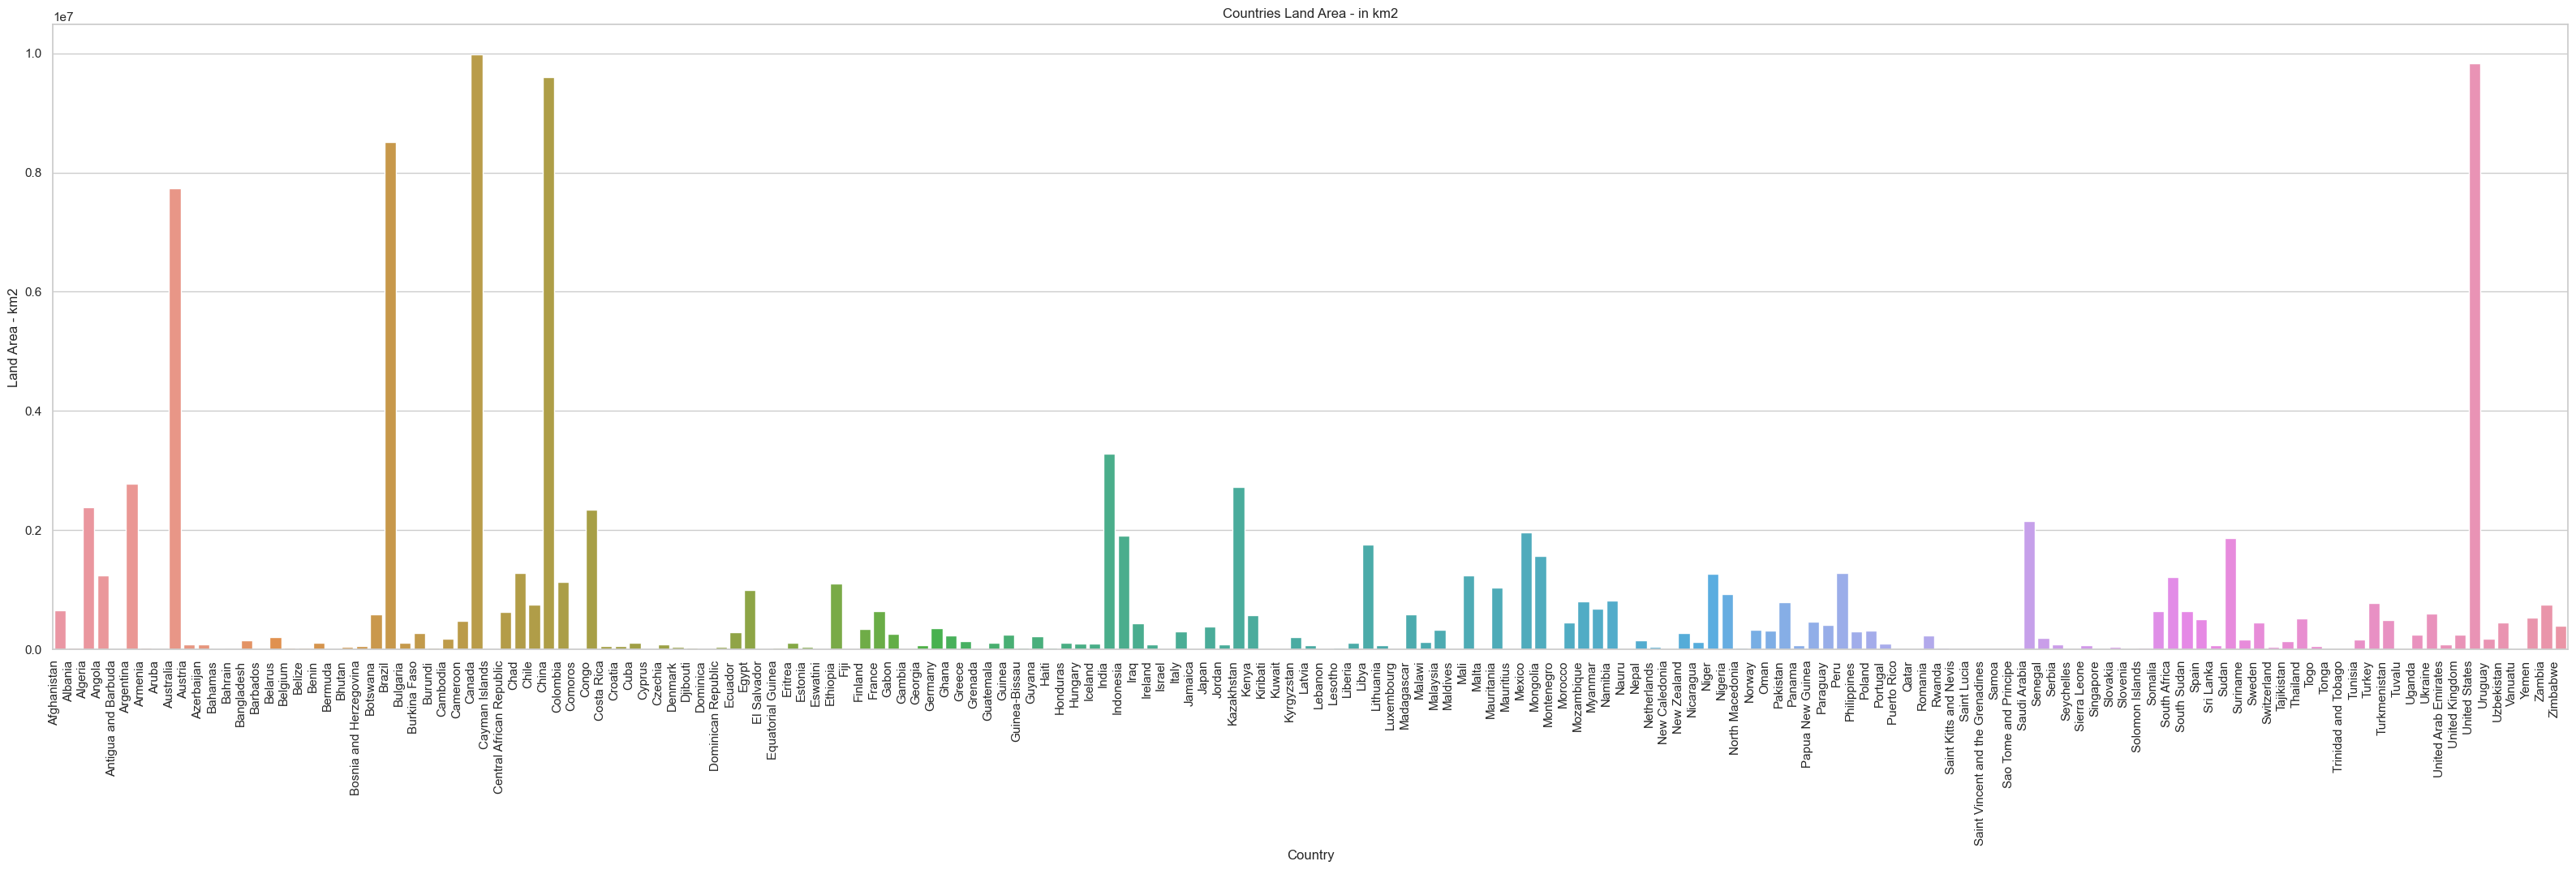

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt


# Check if the DataFrame is not empty
if energy_land_data_use_df.empty:
    print("DataFrame is empty. Please check your data.")
else:
    # Set the style for the plot
    sns.set(style="whitegrid")

    # Create a bar plot using Seaborn
    plt.figure(figsize=(40, 10))
    bar_plot = sns.barplot(x='Country', y='Land', data=energy_land_data_use_df)

    # Set plot labels and title
    plt.xlabel('Country')
    plt.ylabel('Land Area - km2')
    plt.title('Countries Land Area - in km2')

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=90, ha='right')

    # Show the plot
    plt.show()


* It's important to say that Land Area was registered in the dataset as km2

With the graph on screen, it's possible to say that the 3 biggest countries in the world are:
1. Canada
2. United States
3. China

However, if we make just a little research, we'll see that Russia is the top 1 biggest country in the world. But, as it's not in the dataset, we won't be able to use it. So let's keep going with this 3.

## Getting the CO2 emission values from the 3 biggest countries

In [38]:
# Gets the useful columns from the original dataset and renames CO2 emission column it to make it easier to access
energy_co2_data = energy_data[['Entity', 'Year', 'Value_co2_emissions_kt_by_country']].rename(columns={'Value_co2_emissions_kt_by_country': 'co2'})

energy_co2_data.isnull().sum()

Entity      0
Year        0
co2       428
dtype: int64

In [39]:
energy_co2_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Entity  3649 non-null   object 
 1   Year    3649 non-null   int64  
 2   co2     3221 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 85.7+ KB


### Dropping missing values

In [40]:
energy_co2_data = energy_co2_data.dropna(axis=0)

### Separating the countries into differents DataFrames so we can plot each graph

In [41]:
# Canada DataFrame with dropped missing values
energy_co2_data_canada = energy_co2_data[(energy_co2_data['Entity'] == 'Canada')].dropna()

# United States DataFrame with dropped missing values
energy_co2_data_united_states = energy_co2_data[(energy_co2_data['Entity'] == 'United States')].dropna()

# China DataFrame with dropped missing values
energy_co2_data_china = energy_co2_data[(energy_co2_data['Entity'] == 'China')].dropna()

## Plotting the CO2 emission values from the 3 biggest countries graphs

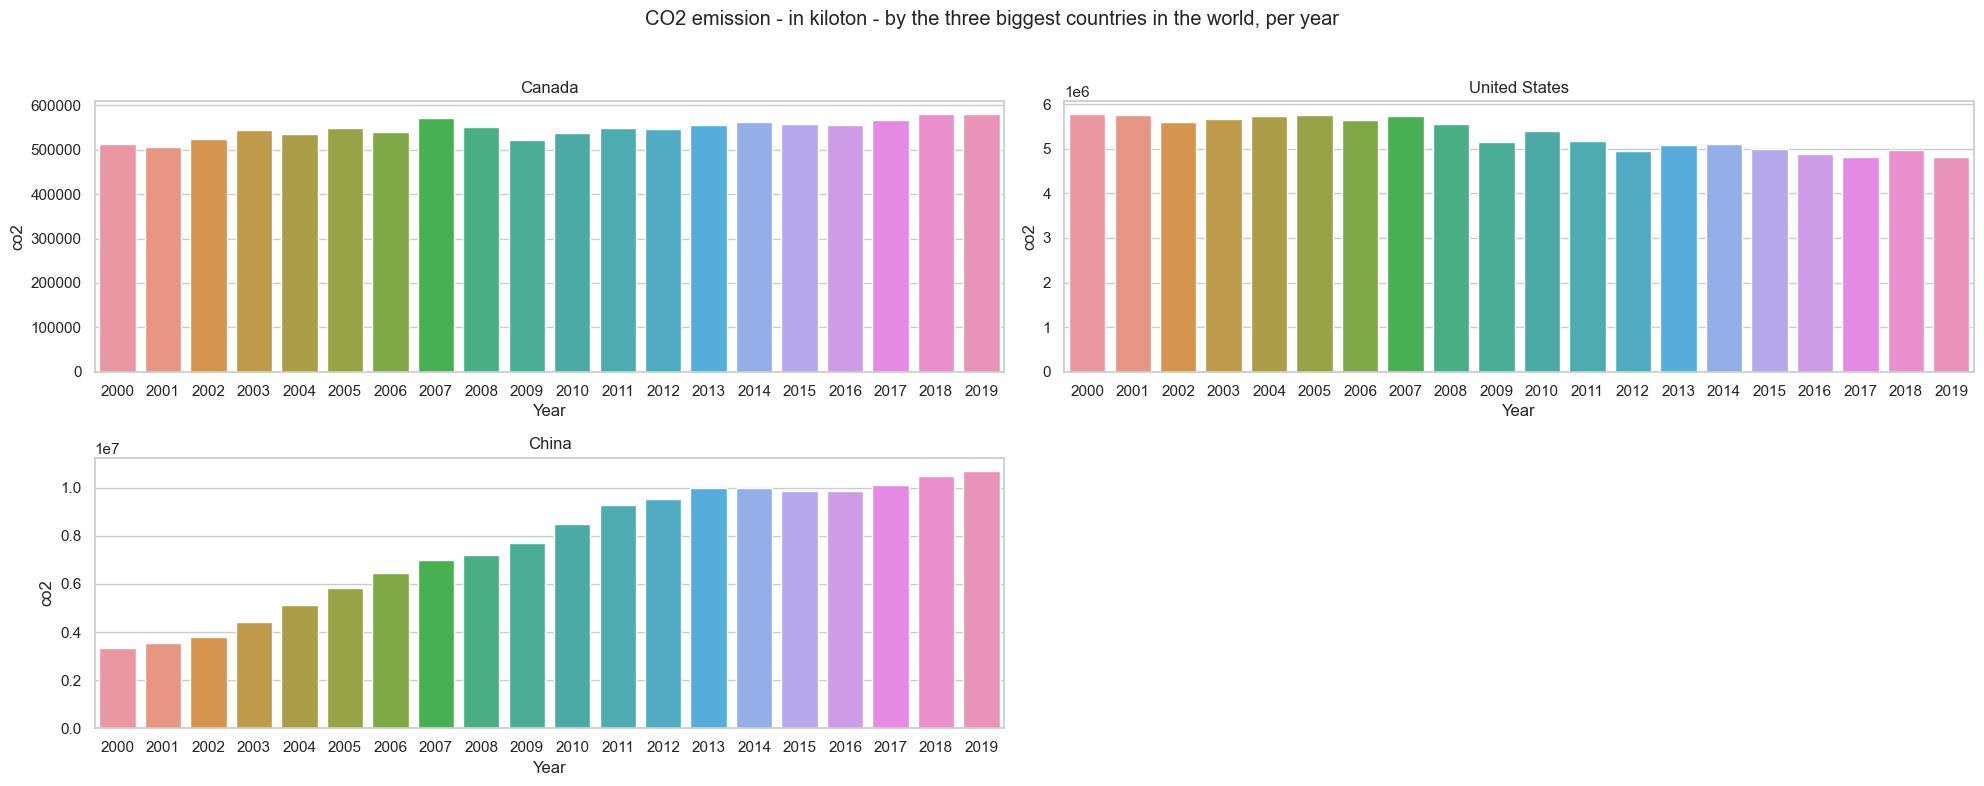

In [60]:
# Check if the DataFrames are not empty
if energy_co2_data_canada.empty or energy_co2_data_united_states.empty or energy_co2_data_china.empty:
    print("One or more DataFrames are empty. Please check your data.")
else:
    # Set the style for the plot
    sns.set(style="whitegrid")

    # Create subplots
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 8))

    # Plot for Canada
    
    sns.barplot(x='Year', y='co2', data=energy_co2_data_canada, ax=axes[0, 0])
    axes[0, 0].set_title('Canada')

    # Plot for the United States
    
    sns.barplot(x='Year', y='co2', data=energy_co2_data_united_states, ax=axes[0, 1])
    axes[0, 1].set_title('United States')

    # Plot for China
   
    sns.barplot(x='Year', y='co2', data=energy_co2_data_china, ax=axes[1, 0])
    axes[1, 0].set_title('China')

    # Remove the empty subplot
    fig.delaxes(axes[1, 1])

    # Set overall title
    plt.suptitle('CO2 emission - in kiloton - by the three biggest countries in the world, per year')

    # Adjust layout
    plt.tight_layout(rect=[0, 0, 1, 0.96])

    # Show the plot
    plt.show()


- From the dataset, CO2 emissions are in kiloton

Making the graphs analyses, we can conclude that Canada, that's the biggest country here, emmited, in 2019, 580.21k - kiloton - of CO2, while United States and China emmited way more than that. So, as conclusion, we can't say that Land Area has something to do with CO2 emissions values.

# Trying another route
As the Land Area was not useful to the raltionship of CO2 emission, let's try to got another way and see if we can find something.

Let's get the top 3 CO2 emissors countries in the world. But, for this, as the dataset has a lot of years registered, getting the most recent one with data available would be great for the analysis, I guess.

## Getting 2019 CO2 emissions

In [43]:
# Gets all the years of 2019
energy_co2_data_2019 = energy_co2_data[(energy_co2_data['Year'] == 2019)]

# Drops the missing values
energy_co2_data_2019 = energy_co2_data_2019.dropna()

# Shows it columns
energy_co2_data_2019.columns

Index(['Entity', 'Year', 'co2'], dtype='object')

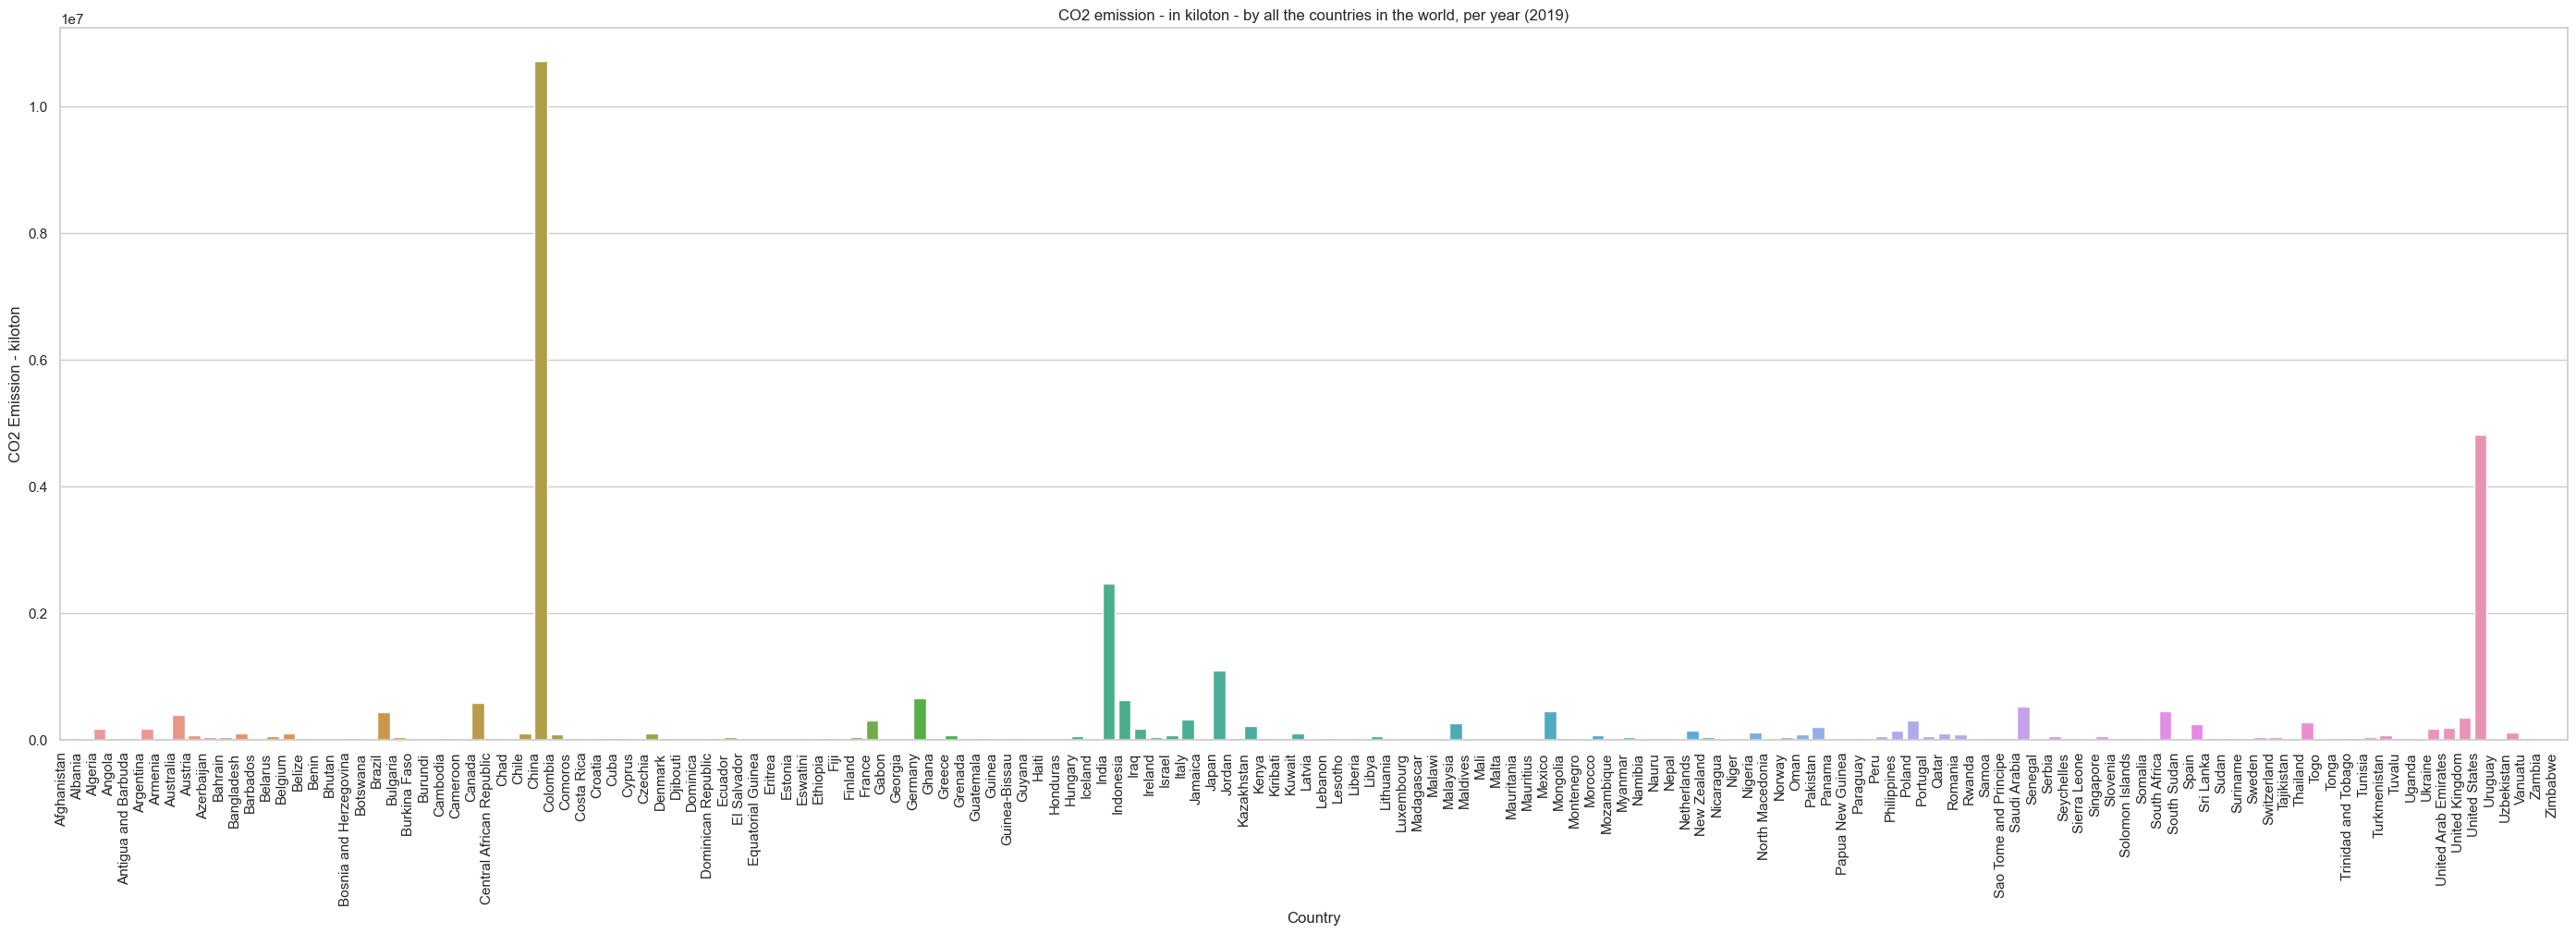

In [64]:
# Check if the DataFrame is not empty
if energy_co2_data_2019.empty:
    print("DataFrame is empty. Please check your data.")
else:
    # Set the style for the plot
    sns.set(style="whitegrid")

    # Create a bar plot for 2019 CO2 emissions
    plt.figure(figsize=(35, 10))
    sns.barplot(x='Entity', y='co2', data=energy_co2_data_2019)

    # Set plot labels and title
    plt.xlabel('Country')
    plt.ylabel('CO2 Emission - kiloton')
    plt.title('CO2 emission - in kiloton - by all the countries in the world, per year (2019)')

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=90, ha='right')

    # Show the plot
    plt.show()


It's possible to say that the top 3 countries that most emmit CO2 are:
1. China
2. United States
3. India

What can we interesting find about this countries? Let's think about it.

Fossil fuels are big CO2 issuers. How is the Electricity from fossil fuels in TWh countries graph?

# CO2 emission and Electricity from fossil fuels

## Getting the Country, Year and Electricity from fossil fuels columns

In [45]:
energy_data_fossil_fuels = energy_data[['Entity', 'Year', 'Electricity from fossil fuels (TWh)']]

energy_data_fossil_fuels_2019 = energy_data_fossil_fuels[(energy_data_fossil_fuels['Year'] == 2019)].dropna()

## Creating the graph

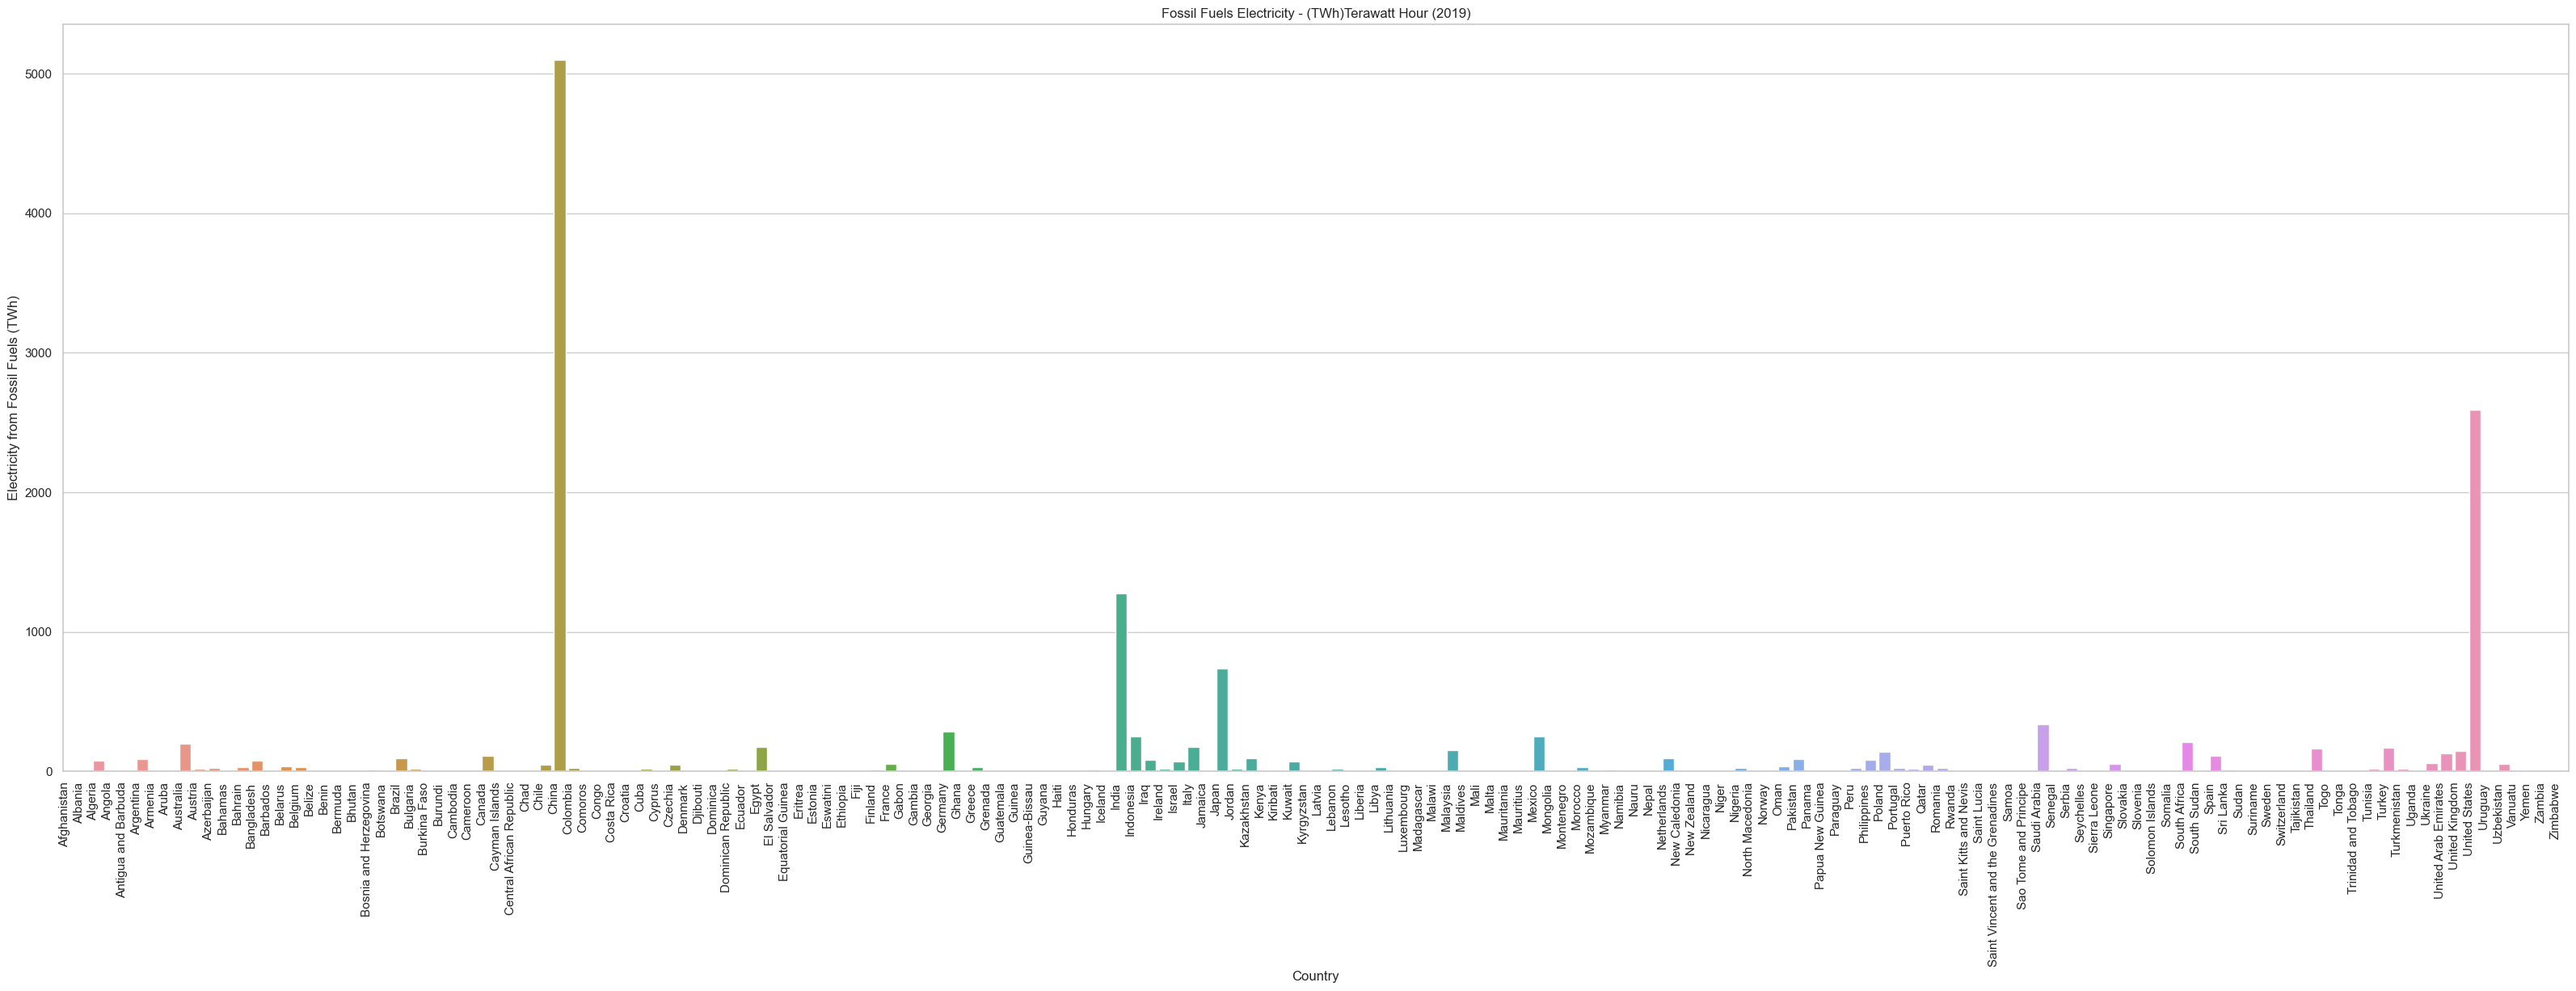

In [66]:
# Check if the DataFrame is not empty
if energy_data_fossil_fuels_2019.empty:
    print("DataFrame is empty. Please check your data.")
else:
    # Set the style for the plot
    sns.set(style="whitegrid")

    # Create a bar plot for fossil fuel electricity in 2019
    plt.figure(figsize=(40, 12))
    sns.barplot(x='Entity', y='Electricity from fossil fuels (TWh)', data=energy_data_fossil_fuels_2019)

    # Set plot labels and title
    plt.xlabel('Country')
    plt.ylabel('Electricity from Fossil Fuels (TWh)')
    plt.title('Fossil Fuels Electricity - (TWh)Terawatt Hour (2019)')

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=90, ha='right')

    # Show the plot
    plt.show()


All right, it makes sense! The top 3 countries of Electricity from fossil fuels follows the same top 3 countries of CO2 emission.

As these CO2 emissions aren't good for the world nature and health, let's see if there's money that is being invested to these countries for clean energy.

# CO2 emission and international finance received for clean energy

In [47]:
energy_data_financial = energy_data[['Entity', 'Year', 'Financial flows to developing countries (US $)']]

energy_data_financial_2019 = energy_data_financial[(energy_data_financial['Year'] == 2019)].dropna()

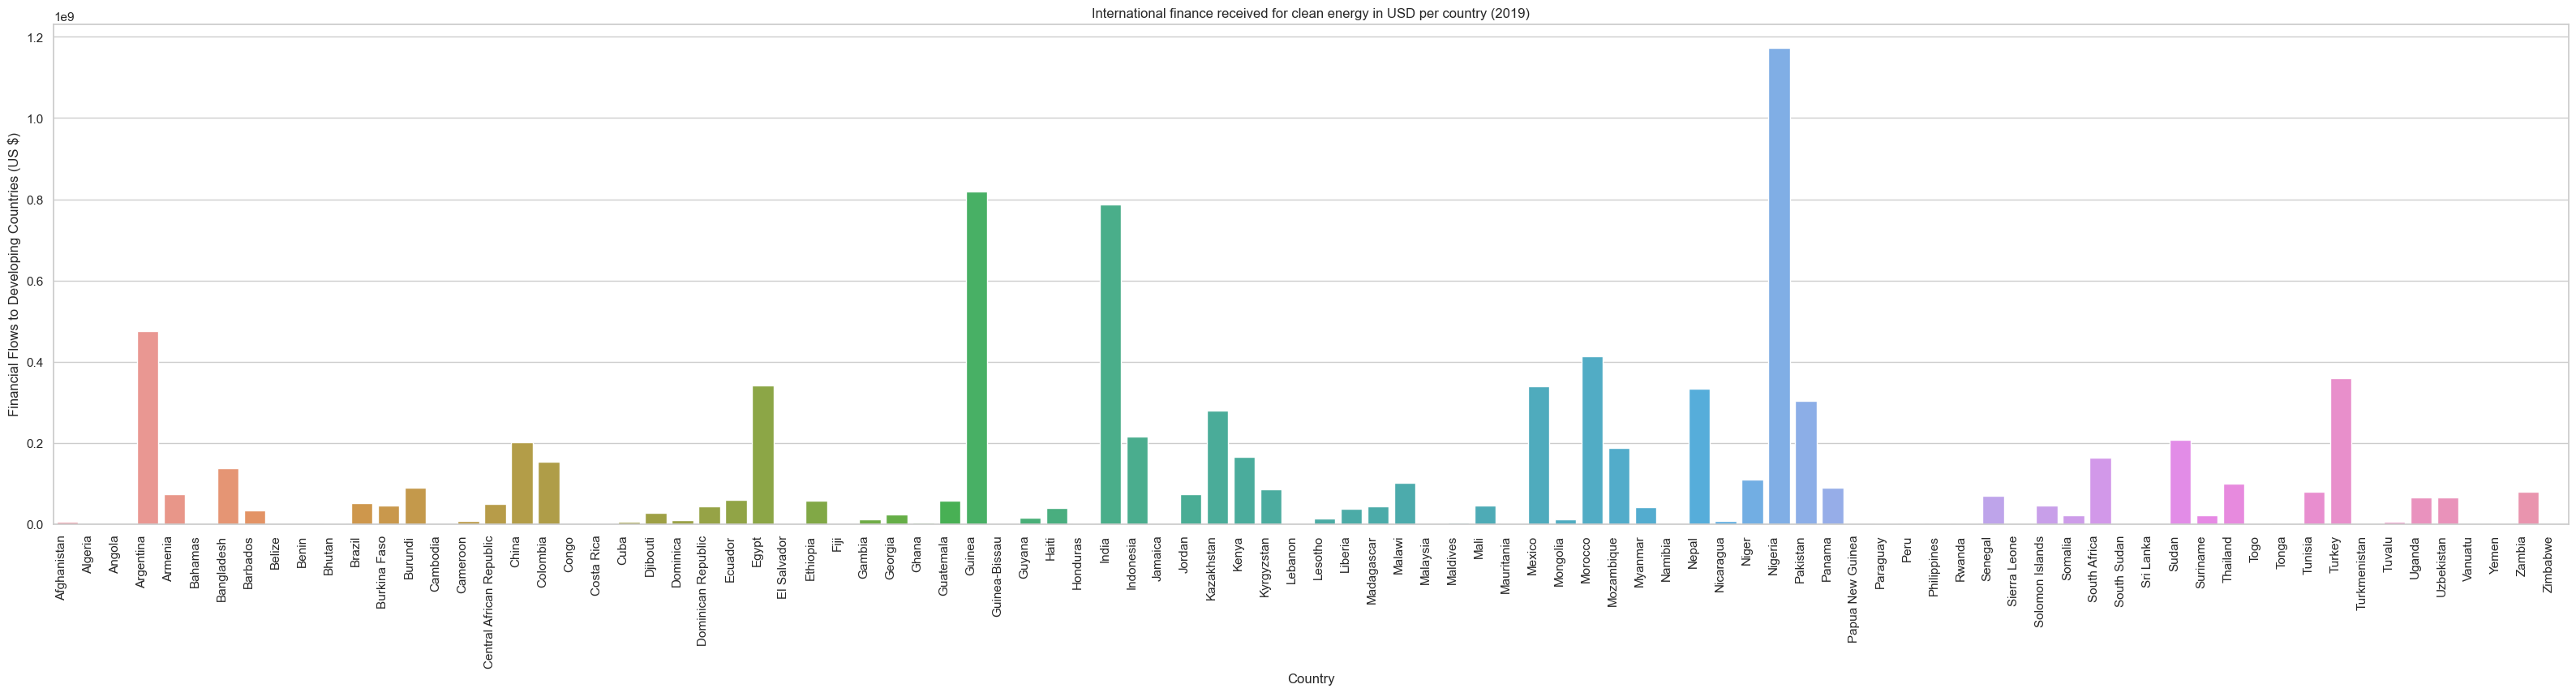

In [68]:
# Check if the DataFrame is not empty
if energy_data_financial_2019.empty:
    print("DataFrame is empty. Please check your data.")
else:
    # Set the style for the plot
    sns.set(style="whitegrid")

    # Create a bar plot for financial flows in 2019
    plt.figure(figsize=(40, 8))
    sns.barplot(x='Entity', y='Financial flows to developing countries (US $)', data=energy_data_financial_2019)

    # Set plot labels and title
    plt.xlabel('Country')
    plt.ylabel('Financial Flows to Developing Countries (US $)')
    plt.title('International finance received for clean energy in USD per country (2019)')

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=90, ha='right')

    # Show the plot
    plt.show()


We can see that from the top 3 CO2 issuers countries in the world, only India gets a noticeable money for clean energy.

I know that clean energy can be kind of complex, such as there are some places that only fits with a specific type of generating clean energy, that it's harder to maintain and other things. But the point that I would like to put here and creates a possible nice and healthy discussion is: the countries that emmits more CO2 in the planet wouldn't be the group that should recieve more money for trying to soften that emission? If so, why does it not happen?

Finally, I would like to say that I'm just trying to undestand what's happening in the data here. But it's nice to visualize this things and talk to other people to get to know their opinion. Please, feel free to comment you ideas and let's talk about it.